## SimpleRNN

In [2]:
# rnn1 = tf.keras.layers.SimpleRNN(units=1, activation='tanh', return_sequences=True)
import numpy as np
import tensorflow as tf
X = []
Y = []
for i in range(6):
    lst = list(range(i, i+4))
    X.append(list(map(lambda c: [c/10], lst)))
    Y.append((i+4)/10)
    
X = np.array(X)
Y = np.array(Y)
for i in range(len(X)):
    print(X[i], Y[i])

[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6
[[0.3]
 [0.4]
 [0.5]
 [0.6]] 0.7
[[0.4]
 [0.5]
 [0.6]
 [0.7]] 0.8
[[0.5]
 [0.6]
 [0.7]
 [0.8]] 0.9


In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=10, return_sequences=False, input_shape=[4,1]),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(X, Y, epochs=100, verbose=0)
print(model.predict(X))

[[0.4873732 ]
 [0.56846845]
 [0.6266489 ]
 [0.6650008 ]
 [0.68723226]
 [0.6967022 ]]


In [8]:
print(model.predict(np.array([[[0.6], [0.7], [0.8], [0.9]]])))
print(model.predict(np.array([[[-0.1], [0.0], [0.1], [0.2]]])))

[[0.6961843]]
[[0.3833957]]


## LSTM 레이어

In [10]:
X = []
Y = []
for i in range(3000):
    lst = np.random.rand(1000)
    idx = np.random.choice(100, 2, replace=False)
    zeros = np.zeros(100)
    zeros[idx] = 1
    X.append(np.array(list(zip(zeros, lst))))
    Y.append(np.prod(lst[idx]))
print(X[0], Y[0])

[[0.         0.02220694]
 [0.         0.70887937]
 [0.         0.02026295]
 [0.         0.16575194]
 [0.         0.70302915]
 [0.         0.04365097]
 [0.         0.90283541]
 [0.         0.8072161 ]
 [0.         0.76276578]
 [0.         0.5630326 ]
 [1.         0.29809994]
 [1.         0.47761222]
 [0.         0.53858876]
 [0.         0.0399282 ]
 [0.         0.15471823]
 [0.         0.60027148]
 [0.         0.91855915]
 [0.         0.57542686]
 [0.         0.87624125]
 [0.         0.25152849]
 [0.         0.66594155]
 [0.         0.29185254]
 [0.         0.26234151]
 [0.         0.16227388]
 [0.         0.29754902]
 [0.         0.49886401]
 [0.         0.84770001]
 [0.         0.55676572]
 [0.         0.95079995]
 [0.         0.85208879]
 [0.         0.09512025]
 [0.         0.75999444]
 [0.         0.80887101]
 [0.         0.24101229]
 [0.         0.23801185]
 [0.         0.25540564]
 [0.         0.45101693]
 [0.         0.0134139 ]
 [0.         0.06846183]
 [0.         0.47543413]


In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.SimpleRNN(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 100, 30)           990       
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 30)                1830      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [12]:
X = np.array(X)
Y = np.array(Y)

history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Train on 2048 samples, validate on 512 samples
Epoch 1/100
2048/2048 [==============================] - 7s 3ms/sample - loss: 0.0784 - val_loss: 0.0539
Epoch 2/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0490 - val_loss: 0.0574
Epoch 3/100
2048/2048 [==============================] - 5s 3ms/sample - loss: 0.0487 - val_loss: 0.0510
Epoch 4/100
2048/2048 [==============================] - 5s 3ms/sample - loss: 0.0495 - val_loss: 0.0507
Epoch 5/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0480 - val_loss: 0.0535
Epoch 6/100
2048/2048 [==============================] - 5s 3ms/sample - loss: 0.0487 - val_loss: 0.0527
Epoch 7/100
2048/2048 [==============================] - 5s 3ms/sample - loss: 0.0482 - val_loss: 0.0514
Epoch 8/100
2048/2048 [==============================] - 5s 3ms/sample - loss: 0.0496 - val_loss: 0.0507
Epoch 9/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0482 - val_loss: 0.0508
Epoch 10

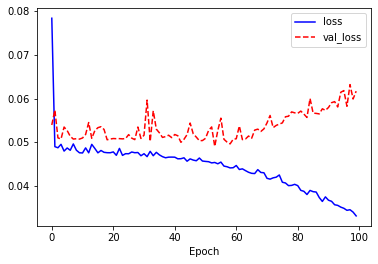

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [17]:
model.evaluate(X[2560:],Y[ 2560:])
prediction = model.predict(X[2560:2567+5])

for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))

prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        fail += 1
print('correctness:', (440 - fail ) / 440 * 100, '%')

440/440 [==============================] - 0s 625us/sample - loss: 0.0621
0.5651872126211629 	 0.36917174 	diff: 0.19601547399659014
0.7317425033244865 	 0.12718348 	diff: 0.6045590212735908
0.651250426661763 	 0.18446359 	diff: 0.46678683627823336
0.017518485144444457 	 0.15152462 	diff: 0.13400613312356854
0.16956357541255973 	 0.035834003 	diff: 0.13372957217268966
correctness: 13.18181818181818 %


In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.LSTM(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 30)           3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [19]:
X = np.array(X)
Y = np.array(Y)

history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Train on 2048 samples, validate on 512 samples
Epoch 1/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0534 - val_loss: 0.0518
Epoch 2/100
2048/2048 [==============================] - 1s 315us/sample - loss: 0.0475 - val_loss: 0.0517
Epoch 3/100
2048/2048 [==============================] - 1s 324us/sample - loss: 0.0474 - val_loss: 0.0508
Epoch 4/100
2048/2048 [==============================] - 1s 310us/sample - loss: 0.0473 - val_loss: 0.0509
Epoch 5/100
2048/2048 [==============================] - 1s 317us/sample - loss: 0.0475 - val_loss: 0.0508
Epoch 6/100
2048/2048 [==============================] - 1s 320us/sample - loss: 0.0473 - val_loss: 0.0508
Epoch 7/100
2048/2048 [==============================] - 1s 314us/sample - loss: 0.0473 - val_loss: 0.0506
Epoch 8/100
2048/2048 [==============================] - 1s 318us/sample - loss: 0.0473 - val_loss: 0.0505
Epoch 9/100
2048/2048 [==============================] - 1s 317us/sample - loss: 0.0477 - val_loss:

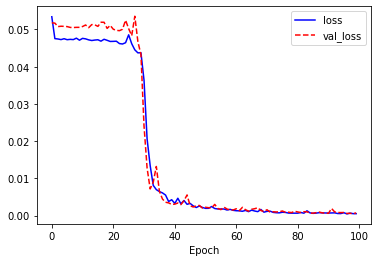

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [21]:
model.evaluate(X[2560:],Y[ 2560:])
prediction = model.predict(X[2560:2567+5])

for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))

prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        fail += 1
print('correctness:', (440 - fail ) / 440 * 100, '%')

440/440 [==============================] - 1s 2ms/sample - loss: 5.9517e-04
0.5651872126211629 	 0.6187391 	diff: 0.053551915491630075
0.7317425033244865 	 0.7511824 	diff: 0.019439874013922886
0.651250426661763 	 0.7031303 	diff: 0.05187987815162198
0.017518485144444457 	 0.012508534 	diff: 0.00500995124942874
0.16956357541255973 	 0.17739654 	diff: 0.007832960460853355
correctness: 92.72727272727272 %


## GRU 레이어

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.GRU(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.GRU(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

ERROR! Session/line number was not unique in database. History logging moved to new session 304
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 100, 30)           3060      
_________________________________________________________________
gru_3 (GRU)                  (None, 30)                5580      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 8,671
Trainable params: 8,671
Non-trainable params: 0
_________________________________________________________________


In [48]:
X = np.array(X)
Y = np.array(Y)

history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Train on 2048 samples, validate on 512 samples
Epoch 1/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 0.0502 - val_loss: 0.0503
Epoch 2/100
2048/2048 [==============================] - 1s 310us/sample - loss: 0.0479 - val_loss: 0.0500
Epoch 3/100
2048/2048 [==============================] - 1s 299us/sample - loss: 0.0476 - val_loss: 0.0502
Epoch 4/100
2048/2048 [==============================] - 1s 301us/sample - loss: 0.0472 - val_loss: 0.0501
Epoch 5/100
2048/2048 [==============================] - 1s 304us/sample - loss: 0.0477 - val_loss: 0.0503
Epoch 6/100
2048/2048 [==============================] - 1s 308us/sample - loss: 0.0472 - val_loss: 0.0501
Epoch 7/100
2048/2048 [==============================] - 1s 294us/sample - loss: 0.0474 - val_loss: 0.0500
Epoch 8/100
2048/2048 [==============================] - 1s 320us/sample - loss: 0.0474 - val_loss: 0.0500
Epoch 9/100
2048/2048 [==============================] - 1s 306us/sample - loss: 0.0470 - val_loss:

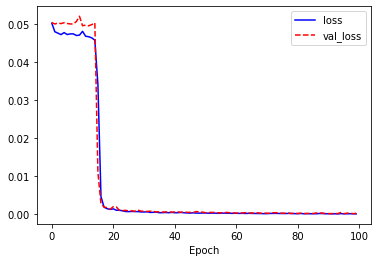

In [49]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [51]:
prediction = model.predict(X[2560:])
cnt = 0
for i in range(len(prediction)):
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        cnt += 1
print('correctness:', (440 - cnt) / 440 * 100, '%')

correctness: 98.4090909090909 %


## Embedding 레이어

In [53]:
tf.keras.preprocessing.text.Tokenizer(
    num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True,
    split=' ', char_level=False, oov_token=None, document_count=0
)

In [54]:
t = tf.keras.preprocessing.text.Tokenizer() 
fit_text = "I love Deep Learning" 
t.fit_on_texts([fit_text]) 
test_text = "I like Deep Learning" 
sequences = t.texts_to_sequences([test_text])[0] 

print("sequences : ",sequences) # great는 단어 집합(vocabulary)에 없으므로 출력되지 않는다.
print("word_index : ",t.word_index) # 단어 집합(vocabulary) 출력

sequences :  [1, 3, 4]
word_index :  {'i': 1, 'love': 2, 'deep': 3, 'learning': 4}


In [55]:
tf.keras.preprocessing.sequence.pad_sequences([[1, 2, 3], [3, 4, 5, 6], [7, 8]], maxlen=3, padding='pre')

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]])

## 긍정, 부정 감정 분석

In [58]:
path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

In [85]:
# 데이터프레임이 더 낫다
import pandas as pd
data = pd.read_csv(path_to_train_file, sep='\t')
data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [59]:
# 데이터 불러오기, 인코딩 utf-8
train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')

In [81]:
# 텍스트 글자수 확인
print('Length of text: {} characters'.format(len(train_text)))
print('Length of text: {} characters'.format(len(test_text)))
print()

# 처음 300자
print(train_text[:360])

Length of text: 6937271 characters
Length of text: 6937271 characters

id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의 긴장감을 제대로 살려내지못했다.	0
9443947	별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인
ERROR! Session/line number was not unique in database. History logging moved to new session 315


In [82]:
# 학습을 위한 정답 데이터(Y)
train_Y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_Y = np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t') > 0])
print(train_Y.shape, test_Y.shape)
print(train_Y[:5])

(150000, 1) (150000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


In [86]:
# 데이터 정제
import re
# https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
def clean_str(string, TREC=False):
    """
    Tokenization/string cleaning for all datasets except for SST.
    Every dataset is lower cased except for TREC
    """
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)     
    string = re.sub(r"\'s", " \'s", string) 
    string = re.sub(r"\'ve", " \'ve", string) 
    string = re.sub(r"n\'t", " n\'t", string) 
    string = re.sub(r"\'re", " \'re", string) 
    string = re.sub(r"\'d", " \'d", string) 
    string = re.sub(r"\'ll", " \'ll", string) 
    string = re.sub(r",", " , ", string) 
    string = re.sub(r"!", " ! ", string) 
    string = re.sub(r"\(", " \( ", string) 
    string = re.sub(r"\)", " \) ", string) 
    string = re.sub(r"\?", " \? ", string) 
    string = re.sub(r"\s{2,}", " ", string) 
    string = re.sub(r"\'{2,}", "\'", string) 
    string = re.sub(r"\''", "", string) 
    
    return string.lower()

train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
test_text_X = [clean_str(sentence) for sentence in train_text_X]
# 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in train_text_X]
for i in range(5):
    print(sentences[i])

['아', '더빙..', '진짜', '짜증나네요', '목소리']
['흠...포스터보고', '초딩영화줄....오버연기조차', '가볍지', '않구나']
['너무재밓었다그래서보는것을추천한다']
['교도소', '이야기구먼', '..솔직히', '재미는', '없다..평점', '조정']
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화!스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


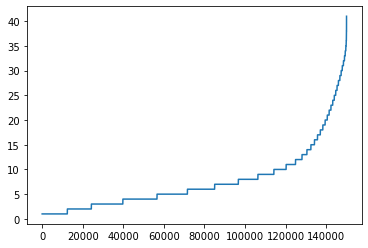

144646


In [87]:
import matplotlib.pyplot as plt
sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

print(sum([int(l<=25) for l in sentence_len]))

In [88]:
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new
for i in range(5):
    print(sentences[i])

['아', '더빙..', '진짜', '짜증나네요', '목소리']
['흠...포', '초딩영화줄', '가볍지', '않구나']
['너무재밓었']
['교도소', '이야기구먼', '..솔직히', '재미는', '없다..평', '조정']
['사이몬페그', '익살스런', '연기가', '돋보였던', '영화!스파', '늙어보이기', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


In [92]:
from konlpy.corpus import kolaw
kolaw = train_text
kolaw[:100]

'id\tdocument\tlabel\n9976970\t아 더빙.. 진짜 짜증나네요 목소리\t0\n3819312\t흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나\t1\n10265843'

ERROR! Session/line number was not unique in database. History logging moved to new session 318


In [93]:
from konlpy.tag import Okt

okt = Okt()
word_dic = {}
lines = kolaw.split('\t')
for line in lines:
    malist = okt.pos(line)
    for word in malist:
        if word[1] == 'Noun':
            if not (word[0] in word_dic):
                word_dic[word[0]] = 0
            word_dic[word[0]] += 1
#빈도
keys = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
for word, count in keys[:50]:
    print("{0}({1}) ".format(word, count), end="")
print()

영화(50737) 정말(9645) 진짜(8343) 이(8001) 점(7930) 연기(6434) 평점(6324) 것(6315) 최고(6035) 스토리(5344) 생각(5314) 왜(5157) 드라마(5063) 감동(4879) 사람(4836) 보고(4612) 말(4565) 더(4366) 때(4314) 내(4306) 배우(4297) 거(4139) 감독(4126) 재미(3930) 내용(3899) 그냥(3838) 뭐(3813) 그(3698) 좀(3655) 쓰레기(3542) 시간(3446) 수(3253) 나(3060) 작품(2964) 사랑(2943) 다시(2838) 하나(2838) 볼(2790) 마지막(2755) 이건(2688) 완전(2542) 정도(2523) 처음(2452) 장면(2436) 액션(2397) 주인공(2382) 걸(2328) 최악(2268) 지금(2206) 돈(2205) 


In [89]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(sentences)
train_X = tokenizer.texts_to_sequences(sentences)
train_X = pad_sequences(train_X, padding='post')

print(train_X[:5])

[[   49     4  6717  1068     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [ 6718     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  324 11089     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   95  5218   787   501     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]]


In [108]:
print(tokenizer.index_word[19998])
print(tokenizer.index_word[20000])

temp = tokenizer.texts_to_sequences(['#$#$#', '경우는', '잊혀질', '연기가'])
print(temp)
temp = pad_sequences(temp, padding='post')
print(temp)

작품!!!
최고인데
[[], [19945], [19946], [95]]
[[    0]
 [19945]
 [19946]
 [   95]]


In [77]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000, 300, input_length=25),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

ERROR! Session/line number was not unique in database. History logging moved to new session 312
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 300)           6000000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                70200     
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 102       
Total params: 6,070,302
Trainable params: 6,070,302
Non-trainable params: 0
_________________________________________________________________


In [78]:
history = model.fit(train_X, train_Y, epochs=5, batch_size=128, validation_split=0.2)

Train on 120000 samples, validate on 30000 samples
Epoch 1/5
120000/120000 [==============================] - 62s 516us/sample - loss: 0.4727 - accuracy: 0.7519 - val_loss: 0.4238 - val_accuracy: 0.7930
Epoch 2/5
120000/120000 [==============================] - 60s 504us/sample - loss: 0.3555 - accuracy: 0.8242 - val_loss: 0.4175 - val_accuracy: 0.7968
Epoch 3/5
120000/120000 [==============================] - 61s 507us/sample - loss: 0.3019 - accuracy: 0.8450 - val_loss: 0.4554 - val_accuracy: 0.7934
Epoch 4/5
120000/120000 [==============================] - 62s 514us/sample - loss: 0.2586 - accuracy: 0.8654 - val_loss: 0.5121 - val_accuracy: 0.7867
Epoch 5/5
120000/120000 [==============================] - 63s 526us/sample - loss: 0.2255 - accuracy: 0.8805 - val_loss: 0.5705 - val_accuracy: 0.7856


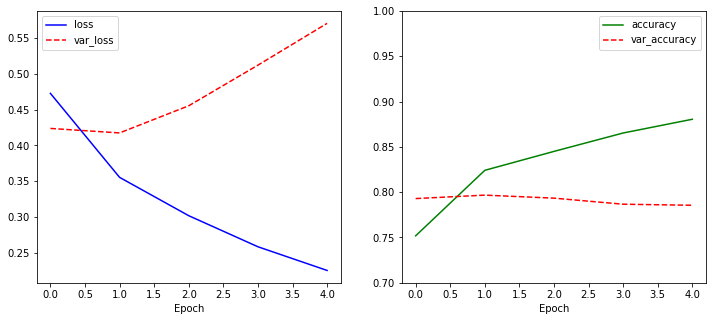

In [98]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='var_loss')
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='var_accuracy')
plt.xlabel("Epoch")
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [79]:
train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
test_text_X = [clean_str(sentence) for sentence in train_text_X]

sentences = [sentence.split(' ') for sentence in train_text_X]
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new
test_X = tokenizer.texts_to_sequences(sentences)
test_X = pad_sequences(test_X, padding='post')

model.evaluate(test_X, test_Y, verbose=0)

[0.2682723677142461, 0.8753333]

In [124]:
test_sentence = '돈이'
test_sentence = test_sentence.split(' ')
test_sentences = []
now_sentence = []

for word in test_sentence:
    now_sentence.append(word)
    test_sentences.append(now_sentence[:])
    
test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=25)
prediction = model.predict(test_X_1)

for idx, sentence in enumerate(test_sentences):
    print(sentence)
    print(prediction[idx])

['돈이']
[0.98061806 0.01938189]


# 자연어 생성

In [10]:
path_to_file = tf.keras.utils.get_file('input1.txt', 'http://bit.ly/2Mc3SOV')

In [34]:
# 데이터 불러오기, 인코딩 utf-8
train_text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

print('Length of text: {} characters'.format(len(train_text)))
print()

print(train_text[:100])

Length of text: 26265493 characters

﻿태조 이성계 선대의 가계. 목조 이안사가 전주에서 삼척·의주를 거쳐 알동에 정착하다 
태조 강헌 지인 계운 성문 신무 대왕(太祖康獻至仁啓運聖文神武大王)의 성은 이씨(李氏)요, 휘


In [35]:
# 데이터 정제
import re
# https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
def clean_str(string):
    """
    Tokenization/string cleaning for all datasets except for SST.
    Every dataset is lower cased except for TREC
    """
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)     
    string = re.sub(r"\'ll", " \'ll", string) 
    string = re.sub(r",", " , ", string) 
    string = re.sub(r"!", " ! ", string) 
    string = re.sub(r"\(", "", string) 
    string = re.sub(r"\)", "", string) 
    string = re.sub(r"\?", " \? ", string) 
    string = re.sub(r"\s{2,}", " ", string) 
    string = re.sub(r"\'{2,}", "\'", string) 
    string = re.sub(r"\'", "", string) 
    
    return string

train_text = train_text.split('\n')
train_text = [clean_str(sentence) for sentence in train_text]
train_text_X = []
for sentence in train_text:
              train_text_X.extend(sentence.split(' '))
              train_text_X.append('\n')
              
train_text_X = [word for word in train_text_X if word != '']
print(train_text_X[:20])     

['태조', '이성계', '선대의', '가계', '목조', '이안사가', '전주에서', '삼척', '의주를', '거쳐', '알동에', '정착하다', '\n', '태조', '강헌', '지인', '계운', '성문', '신무', '대왕']


In [36]:
# 단어의 set을 만든다
vocab = sorted(set(train_text_X))
vocab.append('UNK')
print(' {} unique words'.format(len(vocab)))

# vocab list를 숫자로 매핑하고, 반대도 실행
word2idx = {u:i for i, u in enumerate(vocab)}
idx2word = np.array(vocab)

text_as_int = np.array([word2idx[c] for c in train_text_X])

# word2idx의 일부를 알아보기 쉽게 출력
print('{')
for word,_ in zip(word2idx, range(10)):
    print(' {:4s}: {:3d}, '.format(repr(word), word2idx[word]))
print(' ...\n')

print('index of UNK: {}'.format(word2idx['UNK']))

 332640 unique words
{
 '\n':   0, 
 '!' :   1, 
 ',' :   2, 
 '000명으로':   3, 
 '001':   4, 
 '002':   5, 
 '003':   6, 
 '004':   7, 
 '005':   8, 
 '006':   9, 
 ...

index of UNK: 332639


In [38]:
print(train_text_X[:20])
print(text_as_int[:20])

['태조', '이성계', '선대의', '가계', '목조', '이안사가', '전주에서', '삼척', '의주를', '거쳐', '알동에', '정착하다', '\n', '태조', '강헌', '지인', '계운', '성문', '신무', '대왕']
[299305 229634 161443  17430 111029 230292 251081 155087 225462  29027
 190295 256129      0 299305  25624 273553  36147 163996 180466  84413]


In [39]:
seq_length = 25
examples_per_epoch = len(text_as_int) // seq_length
sentence_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
sentence_dataset = sentence_dataset.batch(seq_length+1, drop_remainder=True)
for item in sentence_dataset.take(1):
    print(idx2word[item.numpy()])
    print(item.numpy())

['태조' '이성계' '선대의' '가계' '목조' '이안사가' '전주에서' '삼척' '의주를' '거쳐' '알동에' '정착하다'
 '\n' '태조' '강헌' '지인' '계운' '성문' '신무' '대왕' '의' '성은' '이씨' '요' ',' '휘']
[299305 229634 161443  17430 111029 230292 251081 155087 225462  29027
 190295 256129      0 299305  25624 273553  36147 163996 180466  84413
 224182 164549 230248 210912      2 330313]


In [40]:
def split_input_target(chunk):
    return [chunk[:-1], chunk[-1]]

train_dataset = sentence_dataset.map(split_input_target)
for x, y in train_dataset.take(1):
    print(idx2word[x.numpy()])
    print(x.numpy())
    print(idx2word[y.numpy()])
    print(y.numpy())

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
['태조' '이성계' '선대의' '가계' '목조' '이안사가' '전주에서' '삼척' '의주를' '거쳐' '알동에' '정착하다'
 '\n' '태조' '강헌' '지인' '계운' '성문' '신무' '대왕' '의' '성은' '이씨' '요' ',']
[299305 229634 161443  17430 111029 230292 251081 155087 225462  29027
 190295 256129      0 299305  25624 273553  36147 163996 180466  84413
 224182 164549 230248 210912      2]
휘
330313


In [41]:
BATCH_SIZE = 128
steps_per_epoch = examples_per_epoch // BATCH_SIZE
BUFFER_SIZE = 10000

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

In [42]:
total_words = len(vocab)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, 100, input_length=seq_length),
    tf.keras.layers.LSTM(units=100, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units=100),
    tf.keras.layers.Dense(total_words, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 100)           33264000  
_________________________________________________________________
lstm_2 (LSTM)                (None, 25, 100)           80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 100)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 332640)            33596640  
Total params: 67,021,440
Trainable params: 67,021,440
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def testmodel(epoch, logs):
    if epoch % 5 != 0 and epoch != 49:
        return
    test_sequence = train_text[0]
    
    next_words = 100
    for _ in range(next_words):
        test_text_X = test_sentence.split(' ')[-seq_length:]
        test_text_X = np.array([word2idx[c] if c in word2idx else word2idx['UNK'] for c in test_text_X])
        test_text_x = pad_sequences([test_text_X], maxlen=seq_length, padding='pre', value=word2idx['UNK'])
        
        output_idx = model.predict_classes(test_text_X)
        test_sentence += ' ' + idx2word[output_idx[0]]
        
    print()
    print(test_sentence)
    print()
        
testmodelcb = tf.keras.callbacks.LambdaCallback(on_epoch_end=testmodel)

history = model.fit(train_dataset.repeat(), epochs=50, steps_per_epoch=steps_per_epoch, callbacks=[testmodelcb], verbose=2)

ERROR! Session/line number was not unique in database. History logging moved to new session 335
Train for 2135 steps
Epoch 1/50


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\BIT\anaconda3\envs\tf2\lib\site-packages\IPython\core\interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-47-32382878d647>", line 23, in <module>
    history = model.fit(train_dataset.repeat(), epochs=50, steps_per_epoch=steps_per_epoch, callbacks=[testmodelcb], verbose=2)
  File "C:\Users\BIT\anaconda3\envs\tf2\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 819, in fit
    use_multiprocessing=use_multiprocessing)
  File "C:\Users\BIT\anaconda3\envs\tf2\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 397, in fit
    prefix='val_')
  File "C:\Users\BIT\anaconda3\envs\tf2\lib\contextlib.py", line 119, in __exit__
    next(self.gen)
  File "C:\Users\BIT\anaconda3\envs\tf2\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 771, in on_epoch
    self.callbacks.on_epoch_end(epoch, epoch_logs)
  

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
test_sentesce = ' '

enxt_words = 100
for _ in range(next_words):
    test_text_X = test_sentence.split(' ')[-seq_length:]
    test_text_X = np.array([word2idx[c] if c in word2idx else word2idx['UNK'] for c in test_text_X])
    test_text_x = pad_sequences([test_text_X], maxlen=seq_length, padding='pre', value=word2idx['UNK'])
        
    output_idx = model.predict_classes(test_text_X)
    test_sentence += ' ' + idx2word[output_idx[0]]

print(test_sentence)        